In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
def readFile(name):
    df = pd.read_json(name, encoding = 'ISO-8859-1')
    print(df.head())
    return df

In [4]:
def plot_categorical_data(df):
    """
    Esta función genera gráficos de barras para todas las columnas categóricas en un DataFrame de pandas.
    Una columna se considera categórica si el número de valores únicos es menor que un cierto umbral.
    
    Parámetros:
    df (pandas.DataFrame): DataFrame del que se generarán los gráficos.
    """
    # Establecer un umbral para determinar si la columna es categórica, por ejemplo, menos de 20 valores únicos
    threshold = 20
    
    # Iterar sobre cada columna en el DataFrame
    for column in df.columns:
        # Comprobar si la columna es categórica
        if column in ['TOT', 'MS']:
            pass
        elif pd.api.types.is_numeric_dtype(df[column]):
            unique_count = df[column].nunique()
            if unique_count < threshold:
                # Si la columna es categórica, graficar un gráfico de barras
                df[column].value_counts().plot(kind='bar', figsize=(10, 5))
                plt.title(f'Distribución de la columna: {column}')
                plt.xlabel('Categoría')
                plt.ylabel('Frecuencia')
                plt.xticks(rotation=90)
                plt.show()
        elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
            # Si es una columna de objeto o categoría directamente
            df[column].value_counts().plot(kind='bar', figsize=(10, 5))
            plt.title(f'Distribución de la columna: {column}')
            plt.xlabel('Categoría')
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=90)
            plt.show()

# Ejemplo de uso
# Supongamos que tienes un DataFrame 'df' ya cargado
# plot_categorical_data(df)


In [5]:
vehicles_sales = readFile('../Data/Maestria_sls_Dummy_S.json')

                    DL_NM    BR      PR   TS              LINE    TYPE  TOT
0  Dimotors Coatzacoalcos  FORD  202401  MTD  RANGER SILVERTON  TRUCKS    1
1  Dimotors Coatzacoalcos  FORD  202401  MTD  RANGER SILVERTON  TRUCKS    3
2  Dimotors Coatzacoalcos  FORD  202401  MTD         LOBO CREW  TRUCKS    2
3  Dimotors Coatzacoalcos  FORD  202401  MTD          MAVERICK  TRUCKS    4
4  Dimotors Coatzacoalcos  FORD  202401  MTD  RANGER SILVERTON  TRUCKS    7


## Análisis Descriptivo de Variables

Este resumen estadístico del conjunto de datos incluye el conteo de observaciones (`count`), número de valores únicos (`unique`), la moda (`top`) y su frecuencia (`freq`), junto con estadísticas descriptivas como la media (`mean`), desviación estándar (`std`), mínimo (`min`), y los percentiles 25%, 50% (mediana), y 75%.

### Variables Categóricas y Descripciones

- **DL_NM**: Nombre del distribuidor
  - Observaciones: 42,043
  - Únicos: 107
  - Moda: Autos De Hermosillo (aparece 1,054 veces)

- **BR**: Marca
  - Observaciones: 42,043
  - Únicos: 2
  - Moda: FORD (aparece 40,430 veces)

- **TS**: Tipo de servicio
  - Observaciones: 42,043
  - Únicos: 1
  - Moda: MTD (todos los registros son MTD)

- **LINE**: Línea de productos
  - Observaciones: 42,043
  - Únicos: 34
  - Moda: TERRITORY (aparece 5,579 veces)

- **TYPE**: Tipo de vehículo
  - Observaciones: 42,043
  - Únicos: 3
  - Moda: TRUCKS (aparece 22,634 veces)

### Variables Numéricas

- **PR**: Código de producto
  - Observaciones: 42,043
  - Media: 202,402.480
  - Desviación Estándar: 1.100
  - Mínimo: 202,401
  - 25%: 202,401
  - 50% (Mediana): 202,403
  - 75%: 202,403
  - Máximo: 202,404

- **TOT**: Total
  - Observaciones: 42,043
  - Media: 7.510
  - Desviación Estándar: 4.605
  - Mínimo: 0
  - 25%: 4
  - 50% (Mediana): 8
  - 75%: 12
  - Máximo: 15

### Observaciones Generales

- Las variables categóricas como **DL_NM**, **BR**, **TS**, **LINE** y **TYPE** muestran claras preferencias o características dominantes, como se observa en las modalidades y sus frecuencias.
- La variable **PR** muestra poca variación entre los productos, con una desviación estándar pequeña, indicando que los códigos de productos no varían mucho dentro del conjunto de datos.
- **TOT** tiene una distribución con una media de aproximadamente 7.5 y un rango que va de 0 a 15, indicando cierta variabilidad en los totales observados.
- El tipo de servicio (**TS**) no varía, con todos los registros reportados como MTD, lo que puede indicar una recopilación de datos para un servicio específico o durante un periodo concreto.


In [6]:
vehicles_sales.describe(include = 'all')

,DL_NM,BR,PR,TS,LINE,TYPE,TOT
count,42043,42043,42043.000000,42043,42043,42043,42043.000000
unique,107,2,NaN,1,34,3,NaN
top,Autos De Hermosillo,FORD,NaN,MTD,TERRITORY,TRUCKS,NaN
freq,1054,40430,NaN,42043,5579,22634,NaN
mean,NaN,NaN,202402.480413,NaN,NaN,NaN,7.509621
std,NaN,NaN,1.100106,NaN,NaN,NaN,4.604533
min,NaN,NaN,202401.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,202401.000000,NaN,NaN,NaN,4.000000
50%,NaN,NaN,202403.000000,NaN,NaN,NaN,8.000000
75%,NaN,NaN,202403.000000,NaN,NaN,NaN,12.000000


No se puede realizar un análisis de correlación ya que la mayoría de las variables son categóricas y el coeficiente de correlación no es relevante ya que la variable **PR** son códigos de productos

In [7]:
vehicles_sales.corr()

,PR,TOT
PR,1.000000,0.008028
TOT,0.008028,1.000000


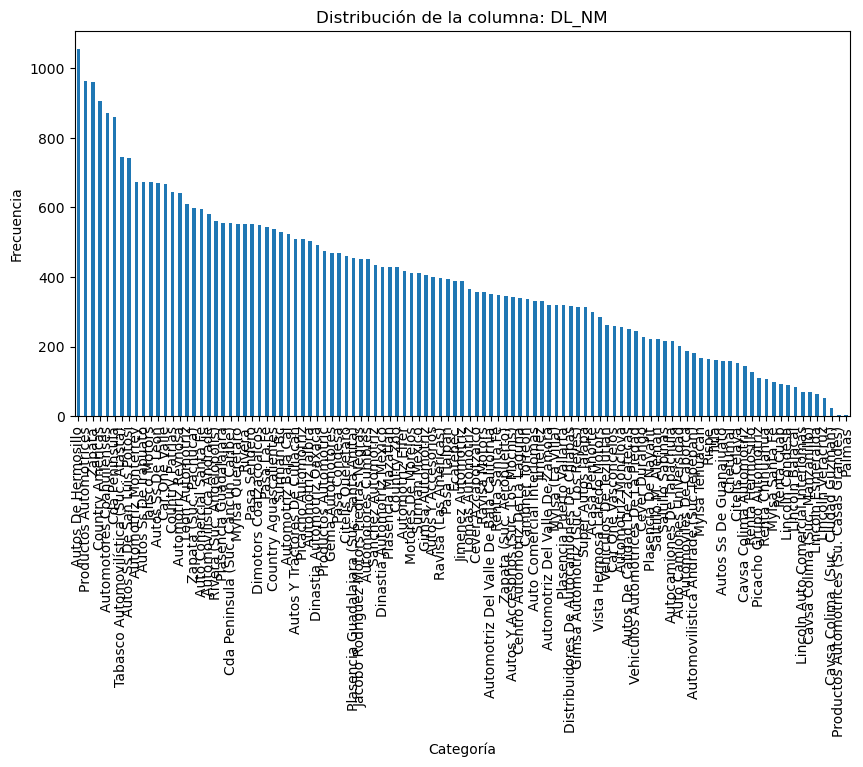

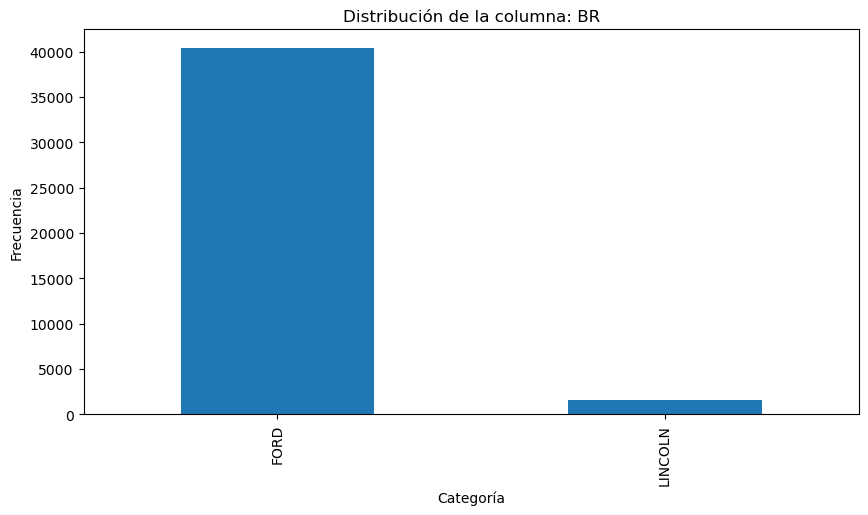

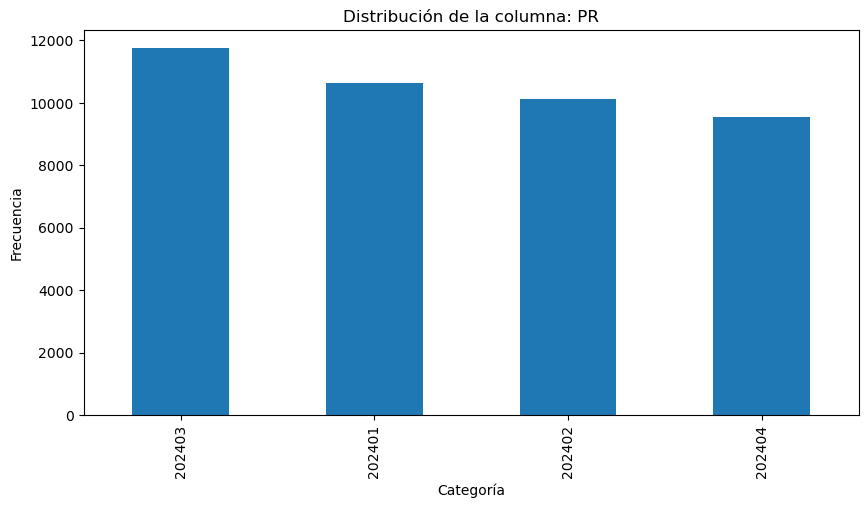

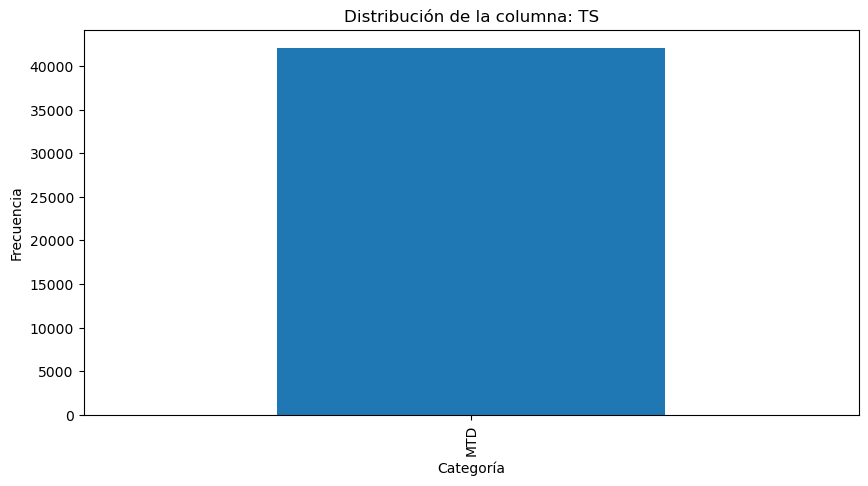

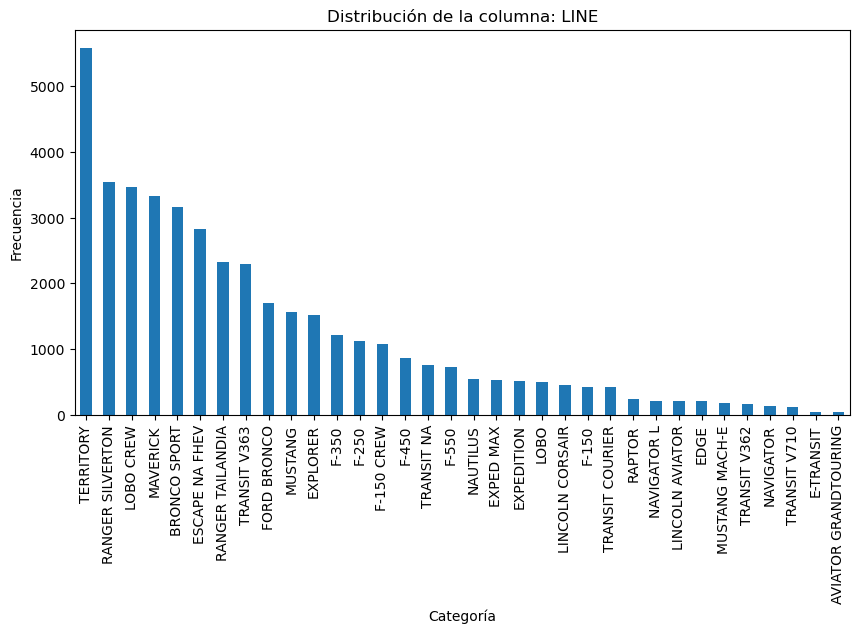

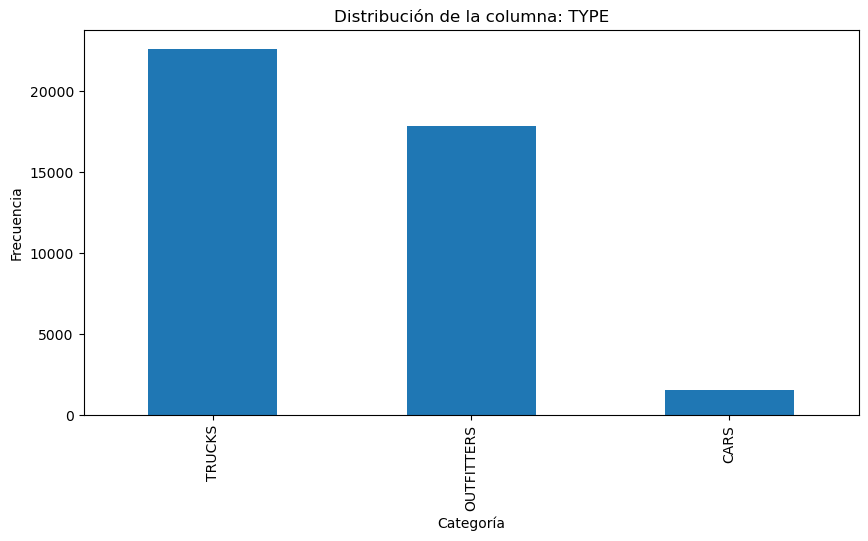

In [8]:
plot_categorical_data(vehicles_sales)

In [9]:
industry_sales = readFile('../Data/Maestria_Indsty_Dummy_S.json')

       PR        BRND   INDST    PMA    PMA_R    MS
0  202401      NISSAN  108293  19970  1 DE 44  0.18
1  202401   CHEVROLET  108293  14426  2 DE 44  0.13
2  202401  VOLKSWAGEN  108293  10264  3 DE 44  0.09
3  202401      TOYOTA  108293   9264  4 DE 44  0.09
4  202401         KIA  108293   8204  5 DE 44  0.08


## Análisis Descriptivo de Variables del Conjunto de Datos

Este resumen estadístico ofrece detalles sobre las variables del conjunto de datos, incluyendo el número total de observaciones (`count`), la cantidad de valores únicos (`unique`), la moda (`top`) y su frecuencia (`freq`), además de proporcionar estadísticas básicas como la media (`mean`), desviación estándar (`std`), y los valores mínimo (`min`), 25%, 50% (mediana), 75%, y máximo (`max`).

### Descripción de Variables

#### Variables Numéricas

- **PR**: Código de Producto
  - Observaciones: 126
  - Media: 202402.000
  - Desviación Estándar: 0.820
  - Mínimo: 202401
  - 25%: 202401
  - 50% (Mediana): 202402
  - 75%: 202403
  - Máximo: 202403

- **INDST**: Industria
  - Observaciones: 126
  - Media: 112,533.333
  - Desviación Estándar: 5,297.497
  - Mínimo: 108,293
  - 25%: 108,293
  - 50% (Mediana): 109,336
  - 75%: 119,971
  - Máximo: 119,971

- **PMA**: Valor del Producto en el Mercado
  - Observaciones: 126
  - Media: 2,578.849
  - Desviación Estándar: 4,349.038
  - Mínimo: 0
  - 25%: 0
  - 50% (Mediana): 786.5
  - 75%: 3,055.5
  - Máximo: 23,531

- **MS**: Cuota de Mercado
  - Observaciones: 126
  - Media: 0.02254
  - Desviación Estándar: 0.03892
  - Mínimo: 0.00000
  - 25%: 0.00000
  - 50% (Mediana): 0.01000
  - 75%: 0.02750
  - Máximo: 0.20000

#### Variables Categóricas

- **BRND**: Marca del Producto
  - Observaciones: 126
  - Únicos: 42
  - Moda: AUDI (aparece 3 veces)

- **PMA_R**: Rango de Posición del Mercado
  - Observaciones: 126
  - Únicos: 44
  - Moda: 11 DE 44 (aparece 3 veces)

### Observaciones Generales

- La variable **PR** muestra poca variación en su valor, sugiriendo que los datos pueden estar agrupados en torno a periodos específicos o categorías de productos.
- **PMA** y **MS** tienen un rango amplio de valores, indicando variabilidad en el tamaño y la participación de mercado de los productos. La presencia de ceros en el 25% inferior de **PMA** sugiere que algunos productos no generan ventas o no están activos.
- Las marcas más representativas incluyen a **AUDI**, aunque con una frecuencia muy baja, lo que indica una alta diversidad de marcas en el conjunto de datos.
- Los datos de **INDST** sugieren que se enfocan en un número limitado de sectores industriales, pero con variaciones significativas en los valores asociados a estos sectores.

In [10]:
industry_sales.describe(include = 'all')

,PR,BRND,INDST,PMA,PMA_R,MS
count,126.000000,126,126.000000,126.000000,126,126.000000
unique,NaN,42,NaN,NaN,44,NaN
top,NaN,JAC,NaN,NaN,1 DE 44,NaN
freq,NaN,3,NaN,NaN,3,NaN
mean,202402.000000,NaN,112533.333333,2578.849206,NaN,0.022540
std,0.819756,NaN,5297.497229,4349.037610,NaN,0.038924
min,202401.000000,NaN,108293.000000,0.000000,NaN,0.000000
25%,202401.000000,NaN,108293.000000,0.000000,NaN,0.000000
50%,202402.000000,NaN,109336.000000,786.500000,NaN,0.010000
75%,202403.000000,NaN,119971.000000,3055.500000,NaN,0.027500


#### Explicacion de la matriz de correlación anterior

1. **PR y INDST**: Tienen una correlación muy alta de **0.903550**, lo que indica que están fuertemente relacionadas positivamente. Cuando una aumenta, la otra también tiende a aumentar en una proporción similar. Esto podría indicar que estos dos atributos están asociados o influyen uno sobre el otro de manera significativa.

2. **PR y PMA**: La correlación es de **0.026503**, lo que indica una relación muy débil y prácticamente insignificante. Esto sugiere que no existe una relación lineal clara entre estas dos variables.

3. **PR y MS**: Con una correlación de **-0.002507**, esta es casi nula, lo que indica que no hay relación lineal entre PR y MS.

4. **INDST y PMA**: Similar a PR y PMA, la correlación de **0.029099** es muy baja, indicando una relación lineal muy débil o inexistente.

5. **INDST y MS**: También muestran una correlación muy baja de **-0.002886**, sugiriendo ninguna relación lineal entre estas variables.

6. **PMA y MS**: Esta es la correlación más significativa en la matriz, con un valor de **0.996762**, lo que indica una correlación positiva casi perfecta. Esto sugiere que ambas variables se mueven casi en la misma proporción. Cuando PMA aumenta, MS también aumenta en una medida casi igual, y viceversa. Esto podría indicar que una variable podría ser un muy buen predictor de la otra o que ambas son influenciadas por factores similares.

En resumen, PMA y MS están fuertemente correlacionadas, mientras que las otras variables muestran correlaciones muy débiles o nulas entre sí. Estos resultados pueden influir significativamente en cómo decides modelar estos datos o qué variables podrías considerar omitir en análisis futuros debido a su baja correlación con otras variables de interés.


In [11]:
industry_sales.corr()

,PR,INDST,PMA,MS
PR,1.000000,0.903550,0.026503,-0.002507
INDST,0.903550,1.000000,0.029099,-0.002886
PMA,0.026503,0.029099,1.000000,0.996762
MS,-0.002507,-0.002886,0.996762,1.000000


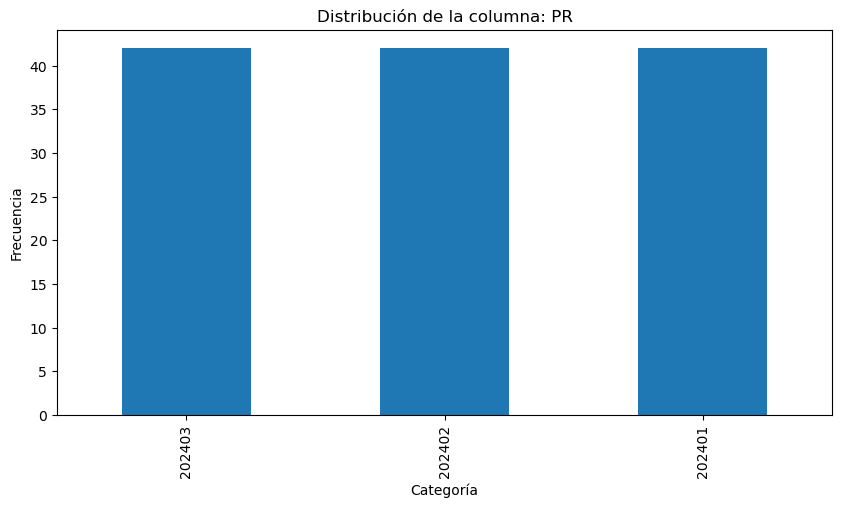

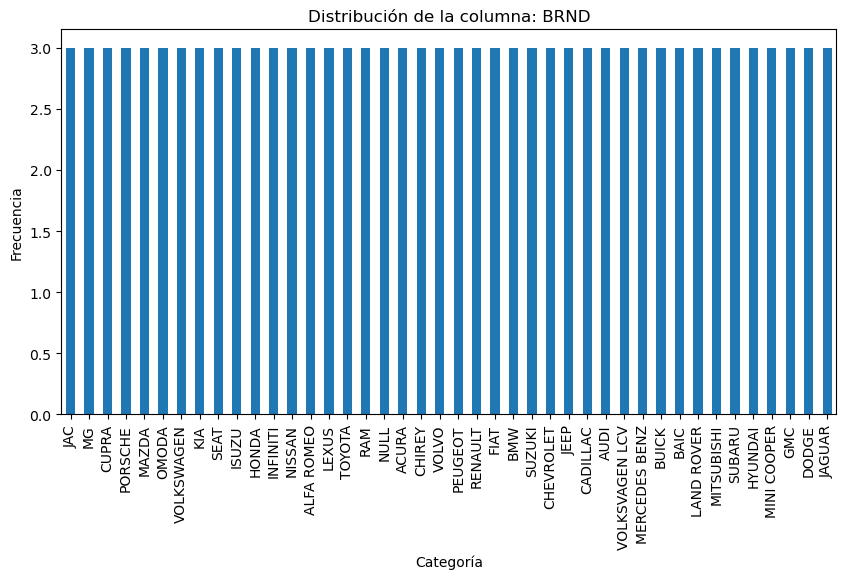

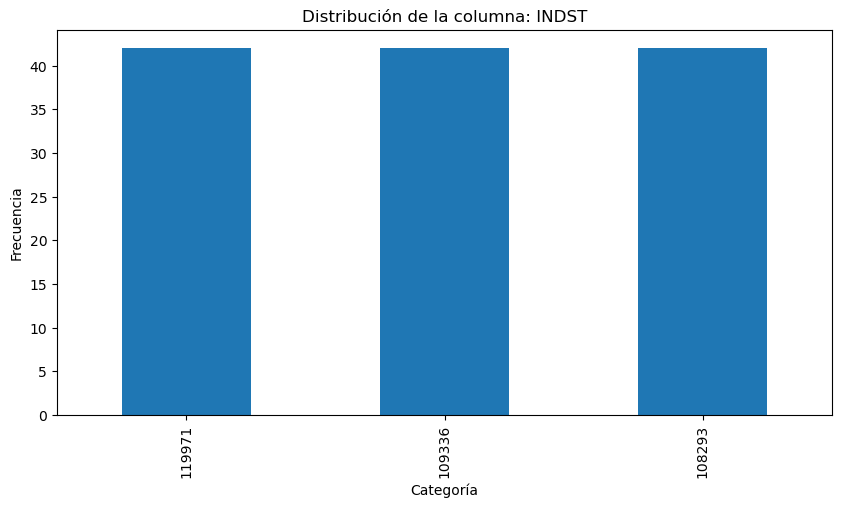

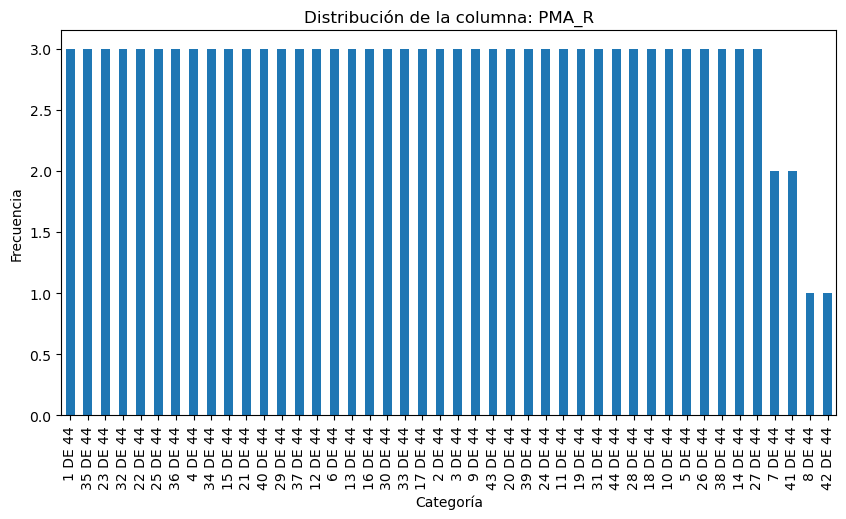

In [12]:
plot_categorical_data(industry_sales)

In [13]:
stock_vehicles = readFile('../Data/Maestria_stck_Dummy_S.json')

                    DL_NM      VIIN      PR        TYP MSS006_LINE_VEH_X  \
0  Dimotors Coatzacoalcos  PBA82406  202401  OUTFITTER              EDGE   
1  Dimotors Coatzacoalcos  PED61524  202401      TRUCK             F-250   
2  Dimotors Coatzacoalcos  PED70372  202401      TRUCK             F-250   
3  Dimotors Coatzacoalcos  PFA55596  202401      TRUCK         LOBO CREW   
4  Dimotors Coatzacoalcos  PFA84357  202401      TRUCK         LOBO CREW   

   MSS006_UNITS_Q MSS006_INVOICE_DATE_Y  MSS006_RANGE_DAYS_Q  \
0               1            2023-07-24                    5   
1               1            2023-11-11                    3   
2               1            2023-09-27                    4   
3               1            2023-02-28                    5   
4               1            2023-03-30                    5   

  MSS006_STATUS_STOCK_C  
0                  STCK  
1                  STCK  
2                  STCK  
3                  INTR  
4                  INTR  


## Análisis Descriptivo de Variables

El siguiente análisis descriptivo proporciona un resumen estadístico de cada variable en el conjunto de datos, incluyendo el conteo de observaciones (`count`), número de valores únicos (`unique`), la moda (`top`) y su frecuencia (`freq`), así como medidas estadísticas como la media (`mean`), desviación estándar (`std`), mínimo (`min`), y los percentiles 25%, 50% (mediana), y 75%.

### Variables Categóricas y Descripciones

- **DL_NM**: Distribuidor de nombres
  - Observaciones: 62,048
  - Únicos: 98
  - Moda: Zapata (aparece 3,966 veces)

- **VIIN**: Identificación del vehículo
  - Observaciones: 62,048
  - Únicos: 59,394
  - Moda: RYF46100 (aparece 6 veces)

- **TYP**: Tipo de vehículo
  - Observaciones: 62,048
  - Únicos: 3
  - Moda: OUTFITTER (aparece 33,478 veces)

- **MSS006_LINE_VEH_X**: Línea de vehículos
  - Observaciones: 62,048
  - Únicos: 33
  - Moda: TERRITORY (aparece 16,903 veces)

- **MSS006_STATUS_STOCK_C**: Estado del stock
  - Observaciones: 62,048
  - Únicos: 3
  - Moda: STCK (aparece 32,480 veces)

### Variables Numéricas

- **PR**: Código de producto
  - Observaciones: 62,048
  - Media: 202,402.959
  - Desviación Estándar: 1.429
  - Mínimo: 202,401
  - 25%: 202,402
  - 50% (Mediana): 202,403
  - 75%: 202,404
  - Máximo: 202,405

- **MSS006_UNITS_Q**: Cantidad de unidades
  - Observaciones: 62,048
  - Media: 1.0 (todos los valores son 1.0, por lo tanto, no hay variación)

- **MSS006_RANGE_DAYS_Q**: Rango de días
  - Observaciones: 62,048
  - Media: 2.701
  - Desviación Estándar: 1.543
  - Mínimo: 0
  - 25%: 1
  - 50% (Mediana): 3
  - 75%: 4
  - Máximo: 5

- **MSS006_INVOICE_DATE_Y**: Fecha de facturación
  - Observaciones: 62,048
  - Únicos: 324
  - Fecha más frecuente: 2023-12-30 (aparece 5,922 veces)

### Observaciones Generales

- La mayoría de las variables categóricas presentan una moda clara, indicando valores predominantes específicos.
- La variable `PR` muestra poca variación, con una desviación estándar muy baja.
- `MSS006_UNITS_Q` no muestra variación, indicando que todas las observaciones tienen una unidad.
- La distribución de `MSS006_RANGE_DAYS_Q` es moderadamente variada pero limitada a un rango de 0 a 5 días.
- Dado que se reportó un 0% de valores faltantes en varias columnas y un pequeño porcentaje en la categoría de marcas, revisa se excluirán del set de datos.
- Las unidades vendidas negativas se revisarán para entender cómo es que se llegó a este valor porque posiblemente se canceló la venta de una flotilla completa, o en caso de que sea un error, corregir el valor.
- Se tendrá que enseñar al LLM lo que significan las columnas para que pueda hacer una correcta interpretación de los datos insertados.
- Para datos temporales o secuenciales, como series de ventas a lo largo del tiempo, se asegurará que las secuencias de entrada para el modelo tengan longitudes consistentes.
- Dado el objetivo de entrenar LLMs, se preparán ejemplos de entrenamiento en formatos de pregunta y respuesta o en - Se realizará un análisis de frecuencia para identificar las marcas y líneas de vehículos más comunes, y un análisis de tendencias temporales, para incorporar estos insights en el diseño de los prompts de entrenamiento.
- También se tiene que identificar casos de uso especiales que permitan entender lo que las personas estarán preguntando al AI Chatbot para asegurarnos que tenemos los datos completos o si necesitamos ingresar más para que pueda contestar lo que se pide.



In [14]:
stock_vehicles.describe(include = 'all')

,DL_NM,VIIN,PR,TYP,MSS006_LINE_VEH_X,MSS006_UNITS_Q,MSS006_INVOICE_DATE_Y,MSS006_RANGE_DAYS_Q,MSS006_STATUS_STOCK_C
count,62048,62048,62048.000000,62048,62048,62048.0,62048,62048.000000,62048
unique,98,59394,NaN,3,33,NaN,324,NaN,3
top,Zapata,RYF10034,NaN,OUTFITTER,TERRITORY,NaN,2023-12-30,NaN,STCK
freq,3966,6,NaN,33478,16903,NaN,5922,NaN,32480
mean,NaN,NaN,202402.959193,NaN,NaN,1.0,NaN,2.701650,NaN
std,NaN,NaN,1.429294,NaN,NaN,0.0,NaN,1.543295,NaN
min,NaN,NaN,202401.000000,NaN,NaN,1.0,NaN,0.000000,NaN
25%,NaN,NaN,202402.000000,NaN,NaN,1.0,NaN,1.000000,NaN
50%,NaN,NaN,202403.000000,NaN,NaN,1.0,NaN,3.000000,NaN
75%,NaN,NaN,202404.000000,NaN,NaN,1.0,NaN,4.000000,NaN


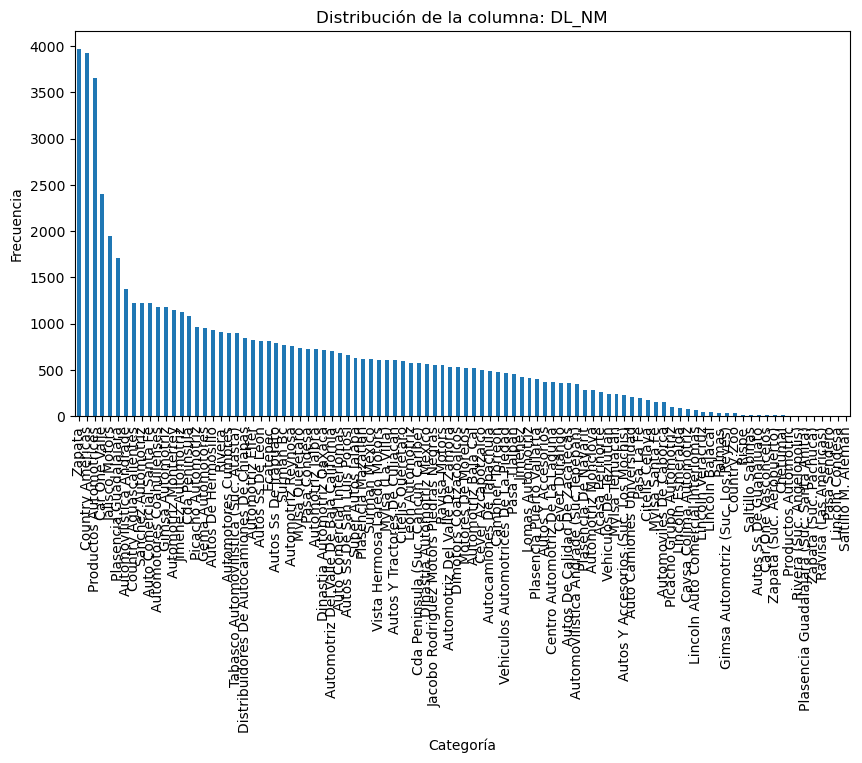

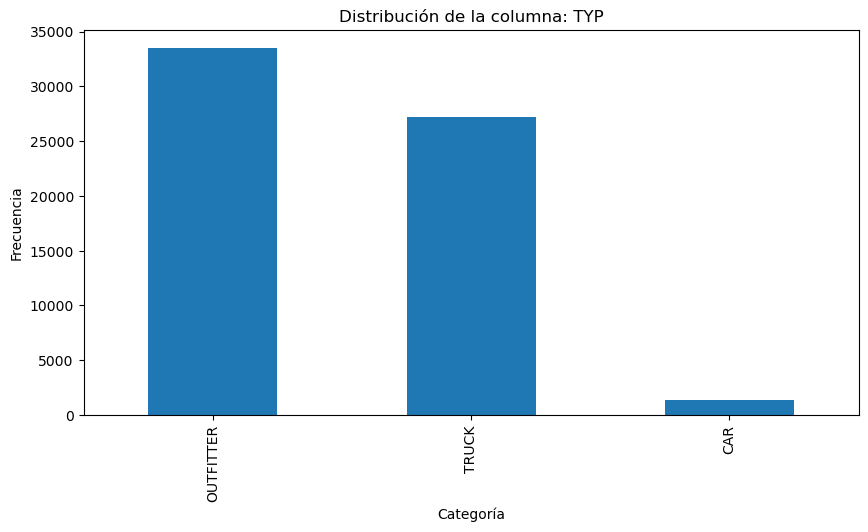

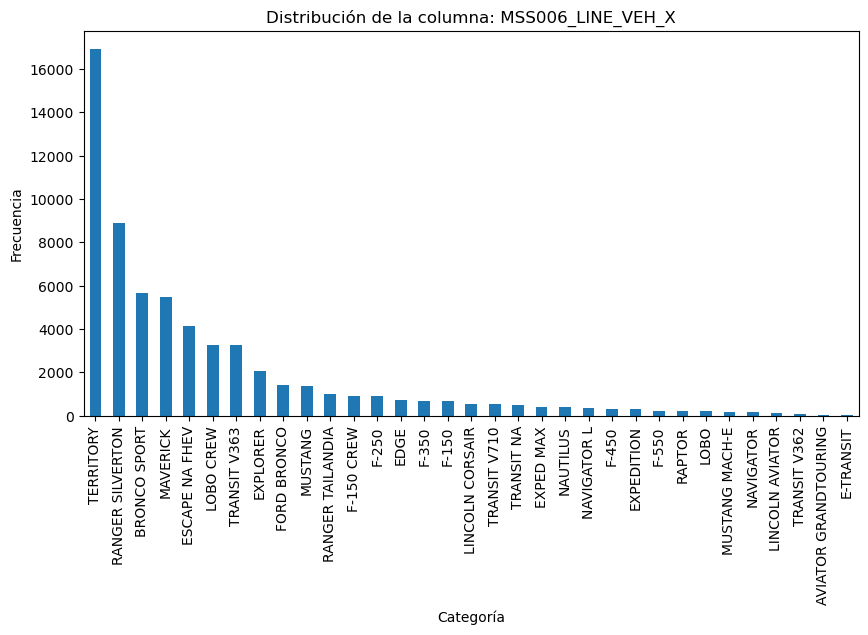

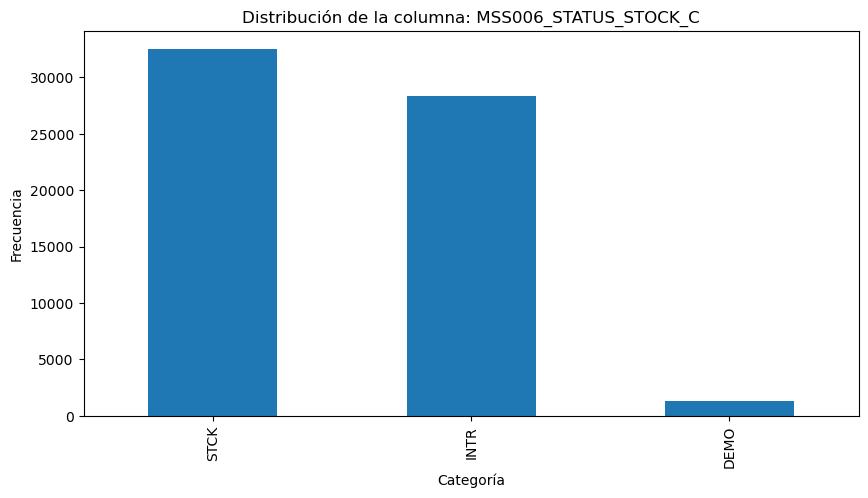

In [15]:
plot_categorical_data(stock_vehicles[['DL_NM', 'TYP', 'MSS006_LINE_VEH_X', 'MSS006_STATUS_STOCK_C']])

Conclusión

A lo largo de nuestra revisión del análisis exploratorio de datos (EDA) para el conjunto de datos, hemos cubierto múltiples aspectos que van desde la evaluación de estadísticas descriptivas hasta la identificación de patrones, valores atípicos y tendencias temporales. 
Este análisis profundo ha revelado la riqueza y complejidad del conjunto de datos, destacando tanto sus fortalezas como las áreas que requieren atención adicional en la preparación para el entrenamiento de Modelos de Lenguaje de Gran Tamaño (LLMs).

Una conclusión clave es la diversidad y la riqueza de información contenida en el conjunto de datos, desde variables numéricas que describen las ventas en detalle hasta variables categóricas que aportan una visión amplia sobre marcas, distribuidores, y tipos de vehículos. 

El análisis también ha subrayado la importancia de las variables temporales, que ofrecen un marco para entender cómo las ventas y otras métricas evolucionan a lo largo del tiempo. Esta dimensión temporal añade una capa de complejidad, pero también una oportunidad para entrenar LLMs que puedan captar y responder a preguntas sobre tendencias y cambios a lo largo del tiempo.

Sin embargo, uno de los retos más significativos al preparar este conjunto de datos para el entrenamiento de LLMs radica en la naturaleza tabular de los datos. Los modelos de lenguaje operan de manera óptima con texto continuo y pueden encontrar dificultades para interpretar y aprender de datos presentados en forma de tablas. 
Esto es relevante cuando se considera entrenar modelos para responder preguntas en lenguaje natural basadas en datos estructurados. La transformación de datos tabulares en un formato más narrativo o la generación de prompts de entrenamiento que encapsulen la información de manera textual serán pasos esenciales para superar esta barrera y aprovechar plenamente el potencial de los LLMs.
